In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

**Cargar dataset**

In [8]:
df = pd.read_csv("Data/Titanic-Dataset.csv", index_col= "PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
df.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# reemplazar duplicados y  nulos
duplicados = df.duplicated().sum()
if duplicados > 0 :
    print(f"Se encontrarons {duplicados} filas duplicadas. Procediendo a eliminarlas")
    df.drop_duplicates(inplace=True)
else:
    print("No se encontraron duplicados")
print("Dimensiones tras el paso de duplicados:", df.shape)    


No se encontraron duplicados
Dimensiones tras el paso de duplicados: (891, 11)


In [12]:
nulos_columnas = df.isnull().sum()
nulos_filas = df[df.isnull().any(axis=1)]
total_nulos = nulos_columnas.sum()
print(total_nulos)

866


In [77]:
#imputacion y eliminacion
if nulos_columnas['Age'] > 0:
    df['Age']= df['Age'].fillna(df['Age'].median())
    print('Remplazo nulos por la mediana!')
else:
    print('No hay valores nulos que limpiar')


Remplazo nulos por la mediana!


In [13]:
if nulos_columnas['Embarked'] > 0:
    df.dropna(subset=["Embarked"], inplace=True)
    print("Limpiesa de nulos completada")
else:
    print("No hay valores nulos que limpiar")
    

Limpiesa de nulos completada


In [14]:
if nulos_columnas["Survived"] > 0:
    df.dropna(subset=["Survived"],inplace=True)
    print("limpieza de nulos completada")
else:
    print("No hay valores que limpiar")

No hay valores que limpiar


In [18]:
promedio_sobrevivientes = df[["Survived"]]
promedio_sobrevivientes.head(1)

,Survived
PassengerId,
1,0


In [19]:
promedio_fallecidos = df[["Survived"]] 
promedio_fallecidos.head(0)


,Survived
PassengerId,


In [22]:
prom_fallecidos= promedio_fallecidos.sum(0)

In [23]:
prom_sob= promedio_sobrevivientes.sum()

<BarContainer object of 1 artists>

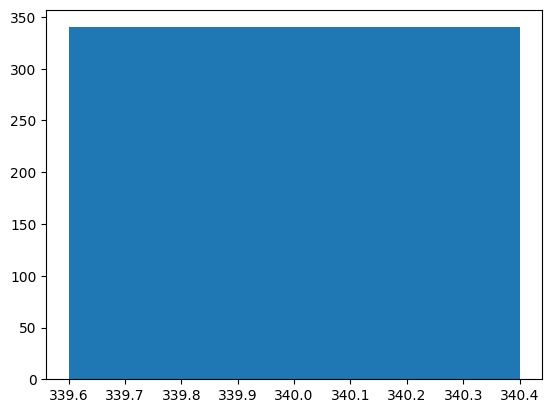

In [24]:
plt.bar(prom_sob,prom_fallecidos)
